In [1]:
using RDatasets
using DataFrames
using Clustering
using LinearAlgebra
using MultivariateStats
using GLM
using Plots

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       4.751000e+01
      1       3.375360e+01      -1.375640e+01 |        8
      2       3.130117e+01      -2.452434e+00 |        9
      3       2.974573e+01      -1.555441e+00 |        6
      4       2.888679e+01      -8.589333e-01 |        6
      5       2.812584e+01      -7.609596e-01 |        5
      6       2.766506e+01      -4.607743e-01 |        2
      7       2.745029e+01      -2.147678e-01 |        2
      8       2.719512e+01      -2.551765e-01 |        3
      9       2.710741e+01      -8.770634e-02 |        2
     10       2.707821e+01      -2.919530e-02 |        0
K-means terminated without convergence after 10 iterations (objv = 27.078214869925517)


KmeansResult{Matrix{Float64}, Float64, Int64}([4.678947368421052 7.666666666666667 … 7.411111111111111 5.4; 3.08421052631579 2.7999999999999994 … 3.2333333333333334 3.8923076923076922; 1.3789473684210527 6.733333333333333 … 6.155555555555555 1.5076923076923079; 0.20000000000000007 2.1333333333333333 … 2.0222222222222226 0.2692307692307693], [8, 1, 1, 1, 8, 10, 1, 8, 1, 1  …  4, 4, 5, 4, 4, 4, 5, 4, 4, 5], [0.022746913580249384, 0.05639889196676506, 0.02008310249307499, 0.02113573407201841, 0.04496913580246087, 0.05414201183431544, 0.11639889196676734, 0.013858024691359105, 0.11218836565096524, 0.07376731301938833  …  0.07747933884300551, 0.3192975206611379, 0.06935185185184878, 0.21747933884296344, 0.20293388429752213, 0.1565702479338711, 0.14046296296294258, 0.15202479338842068, 0.27111570247933514, 0.09268518518516089], [19, 3, 14, 22, 18, 22, 12, 18, 9, 13], [19, 3, 14, 22, 18, 22, 12, 18, 9, 13], 27.078214869925517, 10, false)

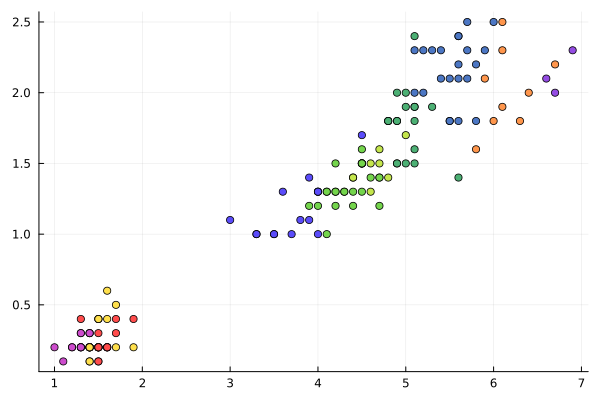

In [2]:
# 1
iris = dataset("datasets", "iris")
select!(iris, Not(:Species))
X = Matrix(iris)
X = X'

result = kmeans(X, 10, maxiter=10, display=:iter)
display(result)

scatter(iris.PetalLength, iris.PetalWidth, marker_z=result.assignments, color=:lightrainbow, legend=false)

In [3]:
# 2.1
X = randn(1000, 3)
a0 = rand(3)
y = X * a0 + 0.1 * randn(1000)

N = 1000
X2 = hcat(ones(N), X)

βhat1 = X2 \ y
yp = X2 * βhat1
mse1 = sqrt(sum(abs2.(y - yp)) / N)
println(βhat1)
println("среднеквадратичная ошибка (МНК в ручную): $(mse1)")

βhat2 = llsq(X, y; bias=false)
yp = X * βhat2
mse2 = sqrt(sum(abs2.(y - yp)) / N)
println(βhat2)
println("среднеквадратичная ошибка (МНК через llsq): $(mse2)")

X3 = DataFrame(a=y, b=X[1:end,1], c=X[1:end,2], d=X[1:end,3])
lmMSE = lm(@formula(a ~ b + c + d), X3)
βhat3 = GLM.coeftable(lmMSE).cols[1]
yp = X2 * βhat3
mse3 = sqrt(sum(abs2.(y - yp)) / N)
println(βhat3)
println("среднеквадратичная ошибка (МНК через GLM): $(mse3)")

println("Разница между ручным и llsq: ", round(mse2-mse1, digits=10),
        "\nРазница между ручным и GLM: ", round(mse3-mse1, digits=10))

[-0.000311618101701213, 0.8606564874922631, 0.4428678136955193, 0.30538050615671286]
среднеквадратичная ошибка (МНК в ручную): 0.0974939439453617
[0.8606705485972929, 0.44285323284271144, 0.30537073840766293]
среднеквадратичная ошибка (МНК через llsq): 0.09749443930530823
[-0.00031161810170119016, 0.8606564874922632, 0.4428678136955195, 0.30538050615671297]
среднеквадратичная ошибка (МНК через GLM): 0.0974939439453617
Разница между ручным и llsq: 4.954e-7
Разница между ручным и GLM: 0.0


LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}:

Coefficients:
─────────────────────────────────────────────────────────────────
        Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────
x1  0.0106298   0.0236228   0.45    0.6537  -0.0362489  0.0575086
x2  1.97581     0.0391357  50.49    <1e-71   1.89815    2.05348
─────────────────────────────────────────────────────────────────



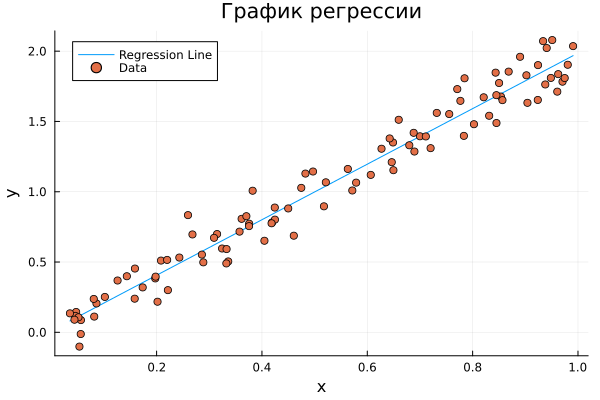

In [4]:
# 2.2
X = rand(100)
y = 2X + 0.1 * randn(100)
Xh = hcat(ones(100), X)
lm2 = fit(LinearModel, Xh, y)
println(lm2)

Plots.plot(title="График регрессии", xlabel="x", ylabel="y", legend=:topleft)
Plots.plot!(X, predict(lm2), label="Regression Line")
Plots.scatter!(X, y, label="Data")
#=
Я не могу это просто какая-то фигня я 4 часа пытался понять что не так а она просто не работает
Plots.abline!(X, predict(lm2), label="Regression Line")
attempt to save state beyond implementation limit

a = GLM.coeftable(lm2).cols[1]
Plots.abline!(a[1], a[2], predict(lm2)[end], color=:green)

Он просто не рисует, от трёх переменных у него стек забивается, от lm у него просто град ошибок,
через раз у него ошибка границ при том что у меня чисто 3 одномерных массива из ровно 100 элементов, 
при этом код его вообще не видет если не написать "Plots." перед ним, а документация это просто прелесть
просто 2 строчки: "abline!([plot,] a, b; kwargs...) Adds ax+b... straight line over the current plot, without changing the axis limits".
В офиальных источниках вообще нет примеров, а интернет-примеры очень ситуативные и не всегда понятны.
Заменил просто на обычным plot по совету от сюда:
https://stackoverflow.com/questions/65895160/julia-how-to-find-best-fit-curve-equation-when-i-have-a-plot
=#

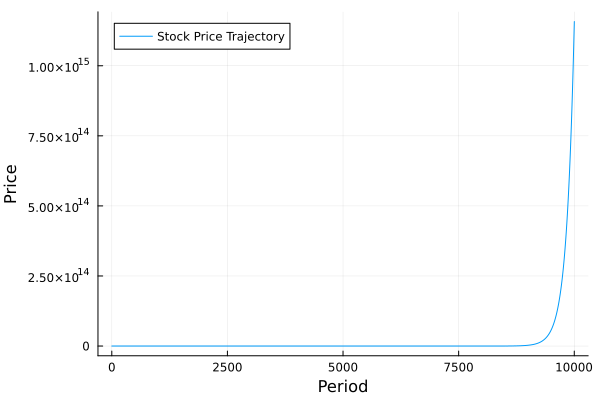

In [5]:
# 3.a
function binomial_stock_price(S, T, n, 𝜎, r)
    h = T/n
    u = exp(r * h + 𝜎 * sqrt(h))
    d = exp(r * h - 𝜎 * sqrt(h))
    p = (exp(r * h) - d) / (u - d)
    
    stock_prices = zeros(n+1)
    stock_prices[1] = S
    
    for i in 1:n
        for j in i:-1:1
            stock_prices[j+1] = u * stock_prices[j]
        end
        stock_prices[1] = d * stock_prices[1]
    end
    return stock_prices
end

S, T, n, 𝜎, r = 100.0, 1.0, 10000, 0.3, 0.08
stock_prices = binomial_stock_price(S, T, n, 𝜎, r)

plot(stock_prices, xlabel="Period", ylabel="Price", label="Stock Price Trajectory")

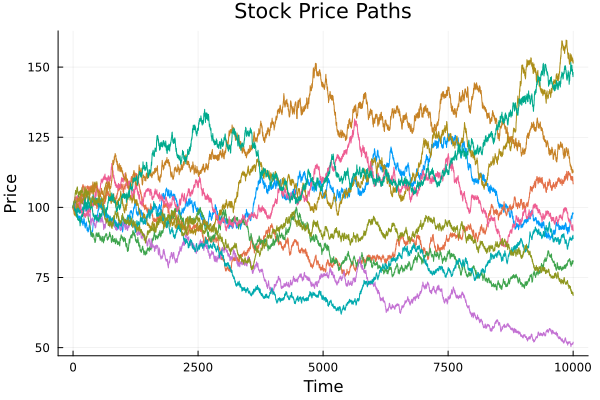

In [6]:
# 3.b
function createPath(S::Float64, r::Float64, sigma::Float64, T::Float64, n::Int64)
    dt = T / n
    t = 0.0
    path = [S]
    
    for i in 1:n
        epsilon = randn()
        S = S * exp((r - 0.5 * sigma^2) * dt + sigma * sqrt(dt) * epsilon)
        t += dt
        push!(path, S)
    end
    return path
end

paths = [createPath(S, r, 𝜎, T, n) for i in 1:10]
plot(paths, title="Stock Price Paths", xlabel="Time", ylabel="Price", legend=false)

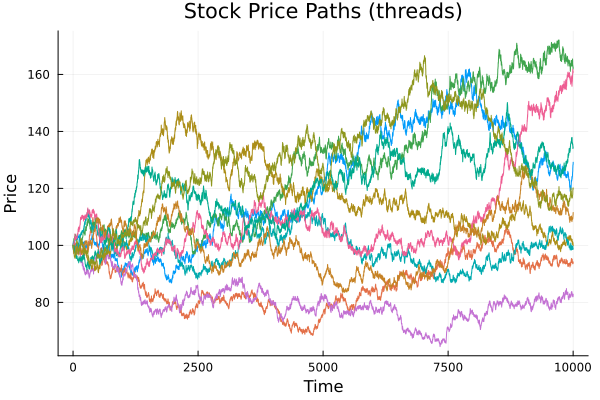

In [13]:
# 3.c
using Random
using Base.Threads

paths2 = []
@threads for i = 1:10
    push!(paths2, createPath(S, r, 𝜎, T, n))
end

plot(paths2, title="Stock Price Paths (threads)", xlabel="Time", ylabel="Price", legend=false)

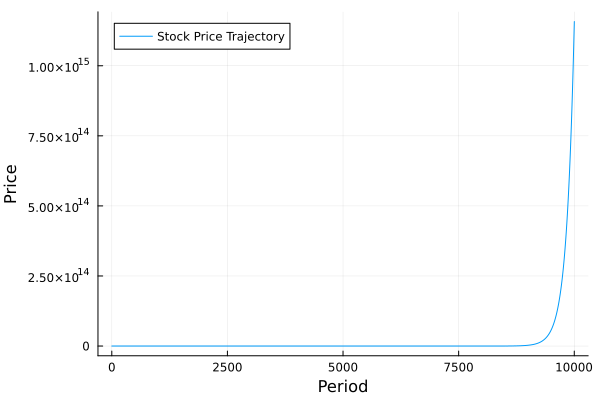

In [15]:
# 3.d
#=
А чем блин отличается этот пункт от "а"?
a) Пусть 𝑆 = 100, 𝑇 = 1, 𝑛 = 10000, 𝜎 = 0.3 и 𝑟 = 0.08. Попробуйте построить
   траекторию курса акций. Функция rand () генерирует случайное число от 0 до 1. Вы
   можете использовать функцию построения графика из библиотеки графиков.
d) Пусть 𝑆 = 100, 𝑇 = 1, 𝑛 = 10000, 𝜎 = 0.3 и 𝑟 = 0.08. Попробуйте построить
   траекторию курса акций. Функция rand () генерирует случайное число от 0 до 1. Вы
   можете использовать функцию построения графика из библиотеки графиков.
Ну ладно повторим :|
=#

S, T, n, 𝜎, r = 100.0, 1.0, 10000, 0.3, 0.08
stock_prices = binomial_stock_price(S, T, n, 𝜎, r)

plot(stock_prices, xlabel="Period", ylabel="Price", label="Stock Price Trajectory")